# Classification Trees

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [9]:
# predict high or low sales of carseats

In [10]:
df3 = pd.read_csv('Carseats.csv')
df3[:5]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
# change name from ShelveLoc to Shelve

In [12]:
df3.rename({'ShelveLoc':'Shelve'},axis=1, inplace = True)

In [13]:
# create categorical response

In [14]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)

In [15]:
df3.iloc[:5,-11:]

,CompPrice,Income,Advertising,Population,Price,Shelve,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [16]:
df4 = pd.get_dummies(df3,columns=['Shelve','Urban','US'])
df4.iloc[:5,-11:]

,Price,Age,Education,High,Shelve_Bad,Shelve_Good,Shelve_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,120,42,17,1,1,0,0,0,1,0,1
1,83,65,10,1,0,1,0,0,1,0,1
2,80,59,12,1,0,0,1,0,1,0,1
3,97,55,14,0,0,0,1,0,1,0,1
4,128,38,13,0,1,0,0,0,1,1,0


In [ ]:
df4 = df4.drop(['Shelve_Bad','Urban_No','US_No'], axis = 1)

In [20]:
df4.iloc[:5,-11:]

,Income,Advertising,Population,Price,Age,Education,High,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,1,0,0,1,1
1,48,16,260,83,65,10,1,1,0,1,1
2,35,10,269,80,59,12,1,0,1,1,1
3,100,4,466,97,55,14,0,0,1,1,1
4,64,3,340,128,38,13,0,0,0,1,0


In [21]:
X = df4.drop(['Sales','High'], axis = 1)
y = df4.High

### Validation Approach

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.5,
                                                test_size=0.5,random_state = 0)

In [23]:
classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
classification_tree_carseats.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
# train accuracy rate

In [25]:
classification_tree_carseats.score(X_train,y_train)

0.945

In [26]:
# test accuracy rate

In [27]:
pred = classification_tree_carseats.predict(X_test)

In [28]:
mat1 = confusion_matrix(y_test,pred)
mat1

array([[102,  16],
       [ 35,  47]], dtype=int64)

In [29]:
cm = pd.DataFrame(mat1,index = ['No','Yes'],columns = ['No','Yes'])
cm

,No,Yes
No,102,16
Yes,35,47


In [30]:
sum1 = cm.values.sum()

In [31]:
(102+47)/sum1

0.745

### K-fold cross validation on Classification Trees

In [32]:
kfold = KFold(n_splits = 10, random_state=7)

In [33]:
tree_model = DecisionTreeClassifier(max_depth = 6)

In [34]:
result = cross_val_score(tree_model,X,y,cv=kfold)
result.mean()

0.71

### Bagging on Classification Trees

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
bag_model = BaggingClassifier(tree_model,n_estimators = 500,random_state=0)

In [37]:
result = cross_val_score(bag_model,X,y,cv=kfold)
result.mean()

0.7874999999999999

# Regression Trees

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
boston_df = pd.read_csv('Boston.csv')
boston_df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
# predict median home value 'medv'

In [41]:
X = boston_df.drop('medv',axis =1)
y = boston_df.medv

### Validation Approach

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                test_size = 0.50,random_state=0)

In [43]:
# max_depth = 2

In [44]:
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test,pred)
mspe

28.80154486445795

In [46]:
np.sqrt(mspe)

5.366707078317015

In [47]:
# predictions are within $5366.7 of the true median home value

In [48]:
# max_depth = 4

In [50]:
regr_tree_boston = DecisionTreeRegressor(max_depth=4)
regr_tree_boston.fit(X_train,y_train)
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test,pred)
mspe

23.81737151382862

In [51]:
# increasing depth reduced test MSE

In [52]:
# plot (max_depth = 4)

In [53]:
xaxis = np.linspace(0,50,100)
yaxis = xaxis

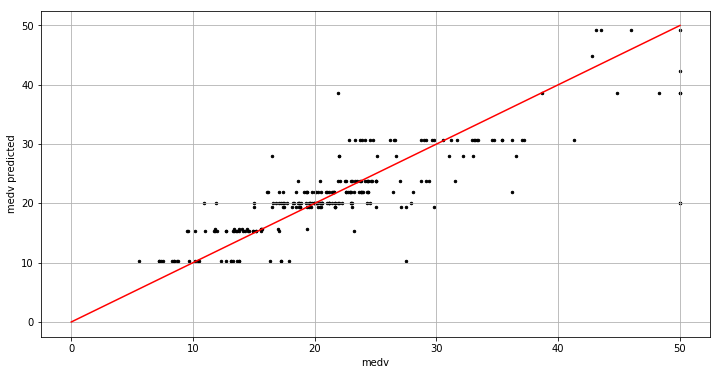

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,pred,s = 6,color='k')
plt.plot(xaxis,yaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

### K-fold cross validation on Regression Trees

In [55]:
kfold = KFold(n_splits = 10, random_state=7)

In [56]:
model = DecisionTreeRegressor(max_depth=5)

In [57]:
result = cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')

In [58]:
# test MSE

In [59]:
result.mean()

-33.1613875529908

## Bagging on Regression Trees

In [60]:
# All p=13 predictors will be considered at each split of the tree
# max_features m = n. of predictors p

In [61]:
bagged_boston = RandomForestRegressor(max_features=13,n_estimators = 500,
                                     random_state=1)
bagged_boston.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [62]:
# test MSE

In [63]:
pred = bagged_boston.predict(X_test)

In [64]:
mean_squared_error(y_test,pred)

15.998707886640329

In [65]:
# significantly lower than that of a single tree

In [66]:
# reduce the number of trees from B=500 to B=25

In [67]:
bagged_boston = RandomForestRegressor(max_features=13,n_estimators = 25,
                                     random_state = 1)
bagged_boston.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [68]:
pred = bagged_boston.predict(X_test)
mean_squared_error(y_test,pred)

17.376042687747038

In [69]:
# higher than test MSE with 500 trees, but still better than single tree test MSE

## Random Forest on Regression Trees

In [70]:
# Not all 13 predictors will be considered at each split
# max_features m < n. predictors p

In [71]:
# I will use m = 6

In [72]:
random_forest_boston = RandomForestRegressor(max_features = 6,
                                            n_estimators = 500,
                                            random_state = 1)
random_forest_boston.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [73]:
# test MSE

In [74]:
pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test,pred)

15.657064488379476

In [75]:
# test MSE slightly smaller (better) than bagging

### importance of each predictor (feature)

In [76]:
Importance = pd.DataFrame({'Importance':random_forest_boston.feature_importances_*100},
                         index = X.columns)
Importance

,Importance
crim,4.890381
zn,0.417102
indus,4.194304
chas,0.326955
nox,4.400022
rm,31.027284
age,2.734233
dis,5.021207
rad,0.579018
tax,2.290990


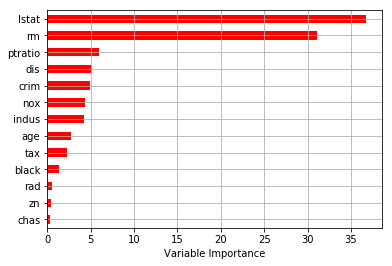

In [77]:
Importance.sort_values(by = 'Importance',axis = 0,ascending = True)\
                      .plot(kind = 'barh',color='r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [78]:
# across all of the trees in the random forest
# the wealth level of the community ('lstat') and the house size ('rm')
# are the two most important predictors

## Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
# limit the depth of the trees to 4 splits

In [81]:
boosted_boston = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01,
                                          max_depth = 4, random_state =1)
boosted_boston.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
importance = boosted_boston.feature_importances_*100

In [83]:
rel_imp = pd.DataFrame({'Importance':importance},index = X.columns)
rel_imp

,Importance
crim,2.297861
zn,0.036181
indus,0.476197
chas,0.176288
nox,0.246680
rm,22.097732
age,1.523807
dis,6.916599
rad,0.105870
tax,1.242695


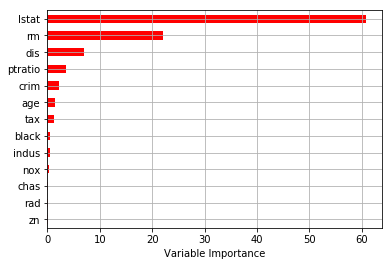

In [84]:
rel_imp.sort_values(by = 'Importance',axis = 0, ascending= True)\
                   .plot(kind = 'barh',color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [85]:
# lstat and rm are the two most important features

In [86]:
# test MSE

In [87]:
mean_squared_error(y_test,boosted_boston.predict(X_test))

17.483377479729086

In [88]:
# not as good as bagging nor random forest

In [89]:
# change learning rate to 0.20

In [90]:
boosted_boston2 = GradientBoostingRegressor(n_estimators = 500,
                                           learning_rate = 0.20,
                                           max_depth = 4, random_state=1)
boosted_boston2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
mean_squared_error(y_test,boosted_boston2.predict(X_test))

17.26563113751168

In [92]:
# small improvement